# Exploring a composite well log (Well 15/9-19 SR) from Volve Field using Lasio package

STAT1990__30-1__15-9-19_SR__COMPOSITE__1.LAS<br>
lasio - Log ASCII Standard (LAS) files in Python (reading & writing LAS files)

Follow along using:<br>
https://lasio.readthedocs.io/en/latest/basic-example.html<br>
https://github.com/kinverarity1/lasio

The lasio project provides a very nice way to read and write CWLS Log ASCII Standard files. The result is an object, based on OrderedDict, that contains all the LAS data — it's more or less analogous to the LAS file.

In [1]:
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Basic example

In [2]:
# Read LAS file in
las = lasio.read('STAT1990__30-1__15-9-19_SR__COMPOSITE__1.las')

In [3]:
#Can retrieve and load data as a pandas DataFrame, 
#build LAS files from scratch, write them back to disc, 
#and export to Excel, amongst other things.

In [4]:
las.header # Shows all header information
# Can access version, well, params independently

{'Version': [HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...),
  HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)],
 'Well': [HeaderItem(mnemonic=STRT, unit=M, value=102.1568, descr=Top Depth),
  HeaderItem(mnemonic=STOP, unit=M, value=4636.514, descr=Bottom Depth),
  HeaderItem(mnemonic=STEP, unit=M, value=0.1524, descr=Depth Increment),
  HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=Null Value),
  HeaderItem(mnemonic=FLD, unit=, value=Q15, descr=Field Name),
  HeaderItem(mnemonic=WELL, unit=, value=15/9-19, descr=NAME),
  HeaderItem(mnemonic=WBN, unit=, value=15/9-19 SR, descr=WELLBORE),
  HeaderItem(mnemonic=NATI, unit=, value=NOR, descr=COUNTRY),
  HeaderItem(mnemonic=CTRY, unit=, value=NOR, descr=COUNTRY),
  HeaderItem(mnemonic=COMP, unit=, value=STATOIL, descr=OPERATOR),
  HeaderItem(mnemonic=PDAT, unit=, value=MSL, descr=PERM DATUM),
  HeaderItem(mnemonic=COUN, unit=, value=NORTH SEA, descr=RIG NAME),
  HeaderItem

In [108]:
# all sections are in the dictionary las.sections

for name, section in las.sections.items():
    print((name, type(section)))

('Version', <class 'lasio.las_items.SectionItems'>)
('Well', <class 'lasio.las_items.SectionItems'>)
('Curves', <class 'lasio.las_items.SectionItems'>)
('Parameter', <class 'lasio.las_items.SectionItems'>)
('Other', <class 'str'>)


In [5]:
# ~VERSION INFORMATION
# Header information is parsed into simple HeaderItem objects, 
# and stored in a dictionary for each section of the header

las.version

[HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...),
 HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)]

In [6]:
# ~Well Information Block

las.well

[HeaderItem(mnemonic=STRT, unit=M, value=102.1568, descr=Top Depth),
 HeaderItem(mnemonic=STOP, unit=M, value=4636.514, descr=Bottom Depth),
 HeaderItem(mnemonic=STEP, unit=M, value=0.1524, descr=Depth Increment),
 HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=Null Value),
 HeaderItem(mnemonic=FLD, unit=, value=Q15, descr=Field Name),
 HeaderItem(mnemonic=WELL, unit=, value=15/9-19, descr=NAME),
 HeaderItem(mnemonic=WBN, unit=, value=15/9-19 SR, descr=WELLBORE),
 HeaderItem(mnemonic=NATI, unit=, value=NOR, descr=COUNTRY),
 HeaderItem(mnemonic=CTRY, unit=, value=NOR, descr=COUNTRY),
 HeaderItem(mnemonic=COMP, unit=, value=STATOIL, descr=OPERATOR),
 HeaderItem(mnemonic=PDAT, unit=, value=MSL, descr=PERM DATUM),
 HeaderItem(mnemonic=COUN, unit=, value=NORTH SEA, descr=RIG NAME),
 HeaderItem(mnemonic=STAT, unit=, value=NORWAY, descr=STATE),
 HeaderItem(mnemonic=PBWE, unit=, value=15/9-19, descr=PB WELL ID),
 HeaderItem(mnemonic=APIN, unit=, value=15/9-19 SR, descr=PB WELLBORE ID),


In [7]:
# ~PARAMETER INFORMATION (log)

las.params

[HeaderItem(mnemonic=LNAM, unit=, value=COMPOSITE, descr=NAME),
 HeaderItem(mnemonic=LTYP, unit=, value=PAP.CMP, descr=LOG TYPE),
 HeaderItem(mnemonic=LSRV, unit=, value=WL.LOG, descr=LOG SERVICE),
 HeaderItem(mnemonic=LSOU, unit=, value=STATOIL, descr=LOG SOURCE),
 HeaderItem(mnemonic=LVSN, unit=, value=1, descr=LOG VERSION),
 HeaderItem(mnemonic=BHIS, unit=, value=R, descr=BRIEF HISTORY),
 HeaderItem(mnemonic=R1, unit=, value=LIS DECODE EDITED AND SPLICED DATA., de...),
 HeaderItem(mnemonic=R2, unit=, value=LIS DECODE INCLUDING HYBRID CURVES., de...),
 HeaderItem(mnemonic=ELZ, unit=, value=0.0, descr=ELEVATION LOG ZERO),
 HeaderItem(mnemonic=FHIS, unit=, value=RAW-LIS, descr=FULL HISTORY),
 HeaderItem(mnemonic=QCRM, unit=, value=Waiting for Statoil confirmation, des...),
 HeaderItem(mnemonic=QCCD, unit=, value=unknown, descr=QC LEVEL),
 HeaderItem(mnemonic=QCCO, unit=, value=UNKNOWN, descr=QC COMPANY),
 HeaderItem(mnemonic=QCST, unit=, value=NOT CHECKED, descr=QC STATUS)]

In [9]:
type(las.data)

numpy.ndarray

In [10]:
las.data.shape

(29754, 8)

In [11]:
# data is stored as a 2D numpy array

las.data

array([[1.0215680e+02,           nan,           nan, ...,           nan,
                  nan,           nan],
       [1.0230920e+02,           nan,           nan, ...,           nan,
                  nan,           nan],
       [1.0246160e+02,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [4.6362092e+03,           nan,           nan, ...,           nan,
        8.7410000e-01, 6.8880000e-01],
       [4.6363616e+03,           nan,           nan, ...,           nan,
        9.0020000e-01, 8.9020000e-01],
       [4.6365140e+03,           nan,           nan, ...,           nan,
        9.1330000e-01, 1.0363000e+00]])

In [12]:
las.keys()

['DEPT', 'AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED']

In [13]:
las.values()

[array([ 102.1568,  102.3092,  102.4616, ..., 4636.2092, 4636.3616,
        4636.514 ]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([5.3274, 5.8235, 6.5228, ...,    nan,    nan,    nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([   nan,    nan,    nan, ..., 0.8741, 0.9002, 0.9133]),
 array([   nan,    nan,    nan, ..., 0.6888, 0.8902, 1.0363])]

In [14]:
# Data accessible directly as numpy 1D arrays

las['DEPT']

array([ 102.1568,  102.3092,  102.4616, ..., 4636.2092, 4636.3616,
       4636.514 ])

In [102]:
type(las.data)

numpy.ndarray

In [15]:
las['GR']

array([5.3274, 5.8235, 6.5228, ...,    nan,    nan,    nan])

In [101]:
las[1]

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 5.97757749, 5.96273162,
       6.0383373 , 6.89575904, 6.48659503, 6.64087797, 6.75263615,
       6.26336529, 7.05251529, 6.87153296, 6.65314563, 6.79710236,
       6.88253647, 7.37455076, 7.3696246 , 7.02327679, 7.23274013,
       7.43706873, 7.51427471, 7.09930258, 7.74310459, 7.53759286,
       7.78818935, 7.6481583 , 7.34166152, 8.07729336, 7.54307581,
       7.82972994, 7.35604233, 7.79416484, 8.0693743 , 8.19112249,
       7.75021422, 7.74900853, 7.50174253, 8.49143824, 7.7888496 ,
       8.3307818 , 7.91305643, 8.00125907, 7.81756408, 7.86493443,
       8.72022665, 8.51681806, 8.46399343, 8.09878892, 8.35435422,
       8.85741593, 8.41650589, 8.27553804, 8.2085931 , 8.46904057,
       8.76378699, 8.41074211, 8.71837912, 8.56804223, 9.06224428,
       8.9518902 , 8.47693857, 8.59308935, 8.85147451, 8.8673034 ,
       9.11225354, 9.10789365, 8.5896439 , 8.55690877, 9.32177

In [16]:
# CurveItem objects with associated metadata

print(las.curves[0])
print(las.curves[1])

CurveItem(mnemonic=DEPT, unit=M, value=00 001 00 00, descr=1  DEPTH, original_mnemonic=DEPT, data.shape=(29754,))
CurveItem(mnemonic=AC, unit=US/F, value=, descr=2  Sonic Transit Time (Slowness), original_mnemonic=AC, data.shape=(29754,))


In [17]:
for curve in las.curves:
    print(curve.mnemonic)
    print(curve.unit)
    print(curve.data)
    print("\n")

DEPT
M
[ 102.1568  102.3092  102.4616 ... 4636.2092 4636.3616 4636.514 ]


AC
US/F
[nan nan nan ... nan nan nan]


CALI
IN
[nan nan nan ... nan nan nan]


DEN
G/CC
[nan nan nan ... nan nan nan]


GR
GAPI
[5.3274 5.8235 6.5228 ...    nan    nan    nan]


NEU
%
[nan nan nan ... nan nan nan]


RDEP
OHMM
[   nan    nan    nan ... 0.8741 0.9002 0.9133]


RMED
OHMM
[   nan    nan    nan ... 0.6888 0.8902 1.0363]




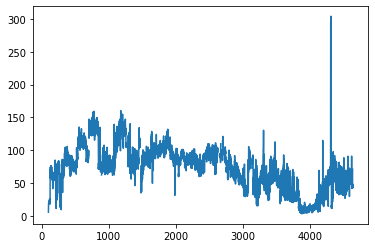

In [18]:
plt.plot(las.index, las['GR'])

### Integration with pandas.DataFrame

`lasio.LASFile.df()` method converts LAS data to pandas.DataFrame

Changes made to the DataFrame can be brought back into the LASFile object with
`lasio.LASFile.set_data()`

In [19]:
df = las.df()

In [20]:
df.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


In [21]:
df.tail()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888
4636.3616,NaN,NaN,NaN,NaN,NaN,0.9002,0.8902
4636.5140,NaN,NaN,NaN,NaN,NaN,0.9133,1.0363


In [22]:
df.columns.to_list()

['AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED']

In [23]:
df.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781
std,18.390705,1.019751,0.165122,32.922780,14.729530,6.631202,5.735731
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400
max,181.813900,20.330400,3.001300,304.333700,146.347400,198.537100,168.604400


In [24]:
# Example of changing a value (max value on DEN log)
df['DEN'][df['DEN'] == 3.001300] = 3.000000

In [25]:
df.describe()['DEN']

count    7084.000000
mean        2.449055
std         0.165121
min         1.943000
25%         2.319975
50%         2.505600
75%         2.585125
max         3.000000
Name: DEN, dtype: float64

In [26]:
# Create new log with moving average of GR log over 1m
# Use pandas.Series.rolling() and LAS file's STEP value

df['GR_avg'] = df['GR'].rolling(int(1 / las.well.STEP.value), center=True).mean()

In [27]:
# Access STEP value in LAS with 
las.well['STEP']

HeaderItem(mnemonic=STEP, unit=M, value=0.1524, descr=Depth Increment)

In [103]:
df['MD_ft'] = df.index / 0.3048

# Or to convert depth index to ft
# df.index = df.index / 0.3048

In [104]:
df.head(10)

,AC,CALI,DEN,GR,NEU,RDEP,RMED,GR_avg,MD,MD_ft
DEPT,,,,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN,NaN,102.1568,335.160105
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN,NaN,102.3092,335.660105
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN,NaN,102.4616,336.160105
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN,8.345633,102.6140,336.660105
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN,10.448450,102.7664,337.160105
102.9188,NaN,NaN,NaN,15.6696,NaN,NaN,NaN,12.490200,102.9188,337.660105
103.0712,NaN,NaN,NaN,17.9443,NaN,NaN,NaN,14.437017,103.0712,338.160105
103.2236,NaN,NaN,NaN,18.0740,NaN,NaN,NaN,16.287833,103.2236,338.660105
103.3760,NaN,NaN,NaN,18.2037,NaN,NaN,NaN,17.781350,103.3760,339.160105


In [106]:
# Slice df on depth range

df[441:442]

,AC,CALI,DEN,GR,NEU,RDEP,RMED,GR_avg,MD,MD_ft
DEPT,,,,,,,,,,
441.0944,NaN,NaN,NaN,73.3038,NaN,2.2401,2.0952,73.170450,441.0944,1447.160105
441.2468,NaN,NaN,NaN,74.4068,NaN,2.2389,2.0972,73.073300,441.2468,1447.660105
441.3992,NaN,NaN,NaN,73.9733,NaN,2.2496,2.1236,73.333600,441.3992,1448.160105
441.5516,NaN,NaN,NaN,73.0594,NaN,2.2724,2.1369,73.715367,441.5516,1448.660105
441.7040,NaN,NaN,NaN,73.3129,NaN,2.2563,2.1235,74.107483,441.7040,1449.160105
441.8564,NaN,NaN,NaN,74.2360,NaN,2.2387,2.1076,74.735867,441.8564,1449.660105


In [107]:
# Last 10 samples (or use .head(10))
df.iloc[-10:]

,AC,CALI,DEN,GR,NEU,RDEP,RMED,GR_avg,MD,MD_ft
DEPT,,,,,,,,,,
4635.1424,NaN,NaN,NaN,NaN,NaN,0.6992,0.7141,NaN,4635.1424,15207.160105
4635.2948,NaN,NaN,NaN,NaN,NaN,0.6423,0.6117,NaN,4635.2948,15207.660105
4635.4472,NaN,NaN,NaN,NaN,NaN,0.5844,0.5339,NaN,4635.4472,15208.160105
4635.5996,NaN,NaN,NaN,NaN,NaN,0.5740,0.5197,NaN,4635.5996,15208.660105
4635.7520,NaN,NaN,NaN,NaN,NaN,0.6552,0.5481,NaN,4635.7520,15209.160105
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978,NaN,4635.9044,15209.660105
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257,NaN,4636.0568,15210.160105
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888,NaN,4636.2092,15210.660105
4636.3616,NaN,NaN,NaN,NaN,NaN,0.9002,0.8902,NaN,4636.3616,15211.160105


In [29]:
# Copy las.index to new 'MD' column in DataFrame
df['MD'] = las.index
df.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED,GR_avg,MD
DEPT,,,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN,NaN,102.1568
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN,NaN,102.3092
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN,NaN,102.4616
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN,8.345633,102.6140
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN,10.448450,102.7664


In [30]:
# Apply the df back to las (LASFile object)
las.set_data(df)

In [31]:
las.curves

[CurveItem(mnemonic=DEPT, unit=M, value=00 001 00 00, descr=1  DEPTH, original_mnemonic=DEPT, data.shape=(29754,)),
 CurveItem(mnemonic=AC, unit=US/F, value=, descr=2  Sonic Transit Time (Slowness), original_mnemonic=AC, data.shape=(29754,)),
 CurveItem(mnemonic=CALI, unit=IN, value=, descr=3  Caliper, original_mnemonic=CALI, data.shape=(29754,)),
 CurveItem(mnemonic=DEN, unit=G/CC, value=, descr=4  Bulk Density, original_mnemonic=DEN, data.shape=(29754,)),
 CurveItem(mnemonic=GR, unit=GAPI, value=, descr=5  Gamma Ray, original_mnemonic=GR, data.shape=(29754,)),
 CurveItem(mnemonic=NEU, unit=%, value=, descr=6  Neutron Porosity, original_mnemonic=NEU, data.shape=(29754,)),
 CurveItem(mnemonic=RDEP, unit=OHMM, value=, descr=7  Deep Resistivity, original_mnemonic=RDEP, data.shape=(29754,)),
 CurveItem(mnemonic=RMED, unit=OHMM, value=, descr=8  Medium Resistivity, original_mnemonic=RMED, data.shape=(29754,)),
 CurveItem(mnemonic=GR_avg, unit=, value=, descr=, original_mnemonic=GR_avg, dat

In [32]:
las.df().describe()

# Check that new max density value of 3.0 is there
# And GR_avg and MD columns have been added

,AC,CALI,DEN,GR,NEU,RDEP,RMED,GR_avg,MD
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000,27973.000000,29754.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781,71.930105,2369.335400
std,18.390705,1.019751,0.165121,32.922780,14.729530,6.631202,5.735731,32.771463,1309.022166
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000,5.400233,102.156800
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850,50.617367,1235.746100
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800,75.021717,2369.335400
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400,92.087483,3502.924700
max,181.813900,20.330400,3.000000,304.333700,146.347400,198.537100,168.604400,287.134517,4636.514000


### Header section metadata

In [33]:
# Header sections are stored in dictionary las.sections
type(las.sections)

dict

In [34]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [35]:
las.sections.values()

dict_values([[HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...), HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)], [HeaderItem(mnemonic=STRT, unit=M, value=102.1568, descr=Top Depth), HeaderItem(mnemonic=STOP, unit=M, value=4636.514, descr=Bottom Depth), HeaderItem(mnemonic=STEP, unit=M, value=0.1524, descr=Depth Increment), HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=Null Value), HeaderItem(mnemonic=FLD, unit=, value=Q15, descr=Field Name), HeaderItem(mnemonic=WELL, unit=, value=15/9-19, descr=NAME), HeaderItem(mnemonic=WBN, unit=, value=15/9-19 SR, descr=WELLBORE), HeaderItem(mnemonic=NATI, unit=, value=NOR, descr=COUNTRY), HeaderItem(mnemonic=CTRY, unit=, value=NOR, descr=COUNTRY), HeaderItem(mnemonic=COMP, unit=, value=STATOIL, descr=OPERATOR), HeaderItem(mnemonic=PDAT, unit=, value=MSL, descr=PERM DATUM), HeaderItem(mnemonic=COUN, unit=, value=NORTH SEA, descr=RIG NAME), HeaderItem(mnemonic=STAT, unit=, value=NORWA

In [36]:
las.sections['Version']

# How does this work?
# lasio is looking for ~v or ~V and reads it in as lasio.las_items_SectionItems
# References in LASFile (LASFile.version and LASFile.sections['Version'])
# ~w for well, ~c for curves, ~p for params, ~o other

# ~a or ~A (~ASCII) is read in as numpy.ndarray
# LASFile.data or each column is in LASFile.curves[...].data)

[HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...),
 HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)]

In [37]:
# Can access the same with
las.version

[HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...),
 HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)]

In [38]:
# Sections themselves are represented by lasio.las_items.SectionItems objects. 
# This is a list which has been extended to allow you to 
# access the items within by their mnemonic.
# Either attribute-style or item-style access is fine


las.version.VERS

HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...)

In [39]:
las.version['VERS']

HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...)

In [40]:
las.version[0]

HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...)

In [112]:
las.version.VERS.value

2.0

In [41]:
las.well

[HeaderItem(mnemonic=STRT, unit=M, value=102.1568, descr=Top Depth),
 HeaderItem(mnemonic=STOP, unit=M, value=4636.514, descr=Bottom Depth),
 HeaderItem(mnemonic=STEP, unit=M, value=0.1524, descr=Depth Increment),
 HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=Null Value),
 HeaderItem(mnemonic=FLD, unit=, value=Q15, descr=Field Name),
 HeaderItem(mnemonic=WELL, unit=, value=15/9-19, descr=NAME),
 HeaderItem(mnemonic=WBN, unit=, value=15/9-19 SR, descr=WELLBORE),
 HeaderItem(mnemonic=NATI, unit=, value=NOR, descr=COUNTRY),
 HeaderItem(mnemonic=CTRY, unit=, value=NOR, descr=COUNTRY),
 HeaderItem(mnemonic=COMP, unit=, value=STATOIL, descr=OPERATOR),
 HeaderItem(mnemonic=PDAT, unit=, value=MSL, descr=PERM DATUM),
 HeaderItem(mnemonic=COUN, unit=, value=NORTH SEA, descr=RIG NAME),
 HeaderItem(mnemonic=STAT, unit=, value=NORWAY, descr=STATE),
 HeaderItem(mnemonic=PBWE, unit=, value=15/9-19, descr=PB WELL ID),
 HeaderItem(mnemonic=APIN, unit=, value=15/9-19 SR, descr=PB WELLBORE ID),


In [42]:
las.well.CTRY

HeaderItem(mnemonic=CTRY, unit=, value=NOR, descr=COUNTRY)

In [43]:
# CTRY value=NOR. Set it to 'Norway'.

las.well.CTRY = 'Norway'
las.well.CTRY

HeaderItem(mnemonic=CTRY, unit=, value=Norway, descr=COUNTRY)

In [44]:
las.curves

[CurveItem(mnemonic=DEPT, unit=M, value=00 001 00 00, descr=1  DEPTH, original_mnemonic=DEPT, data.shape=(29754,)),
 CurveItem(mnemonic=AC, unit=US/F, value=, descr=2  Sonic Transit Time (Slowness), original_mnemonic=AC, data.shape=(29754,)),
 CurveItem(mnemonic=CALI, unit=IN, value=, descr=3  Caliper, original_mnemonic=CALI, data.shape=(29754,)),
 CurveItem(mnemonic=DEN, unit=G/CC, value=, descr=4  Bulk Density, original_mnemonic=DEN, data.shape=(29754,)),
 CurveItem(mnemonic=GR, unit=GAPI, value=, descr=5  Gamma Ray, original_mnemonic=GR, data.shape=(29754,)),
 CurveItem(mnemonic=NEU, unit=%, value=, descr=6  Neutron Porosity, original_mnemonic=NEU, data.shape=(29754,)),
 CurveItem(mnemonic=RDEP, unit=OHMM, value=, descr=7  Deep Resistivity, original_mnemonic=RDEP, data.shape=(29754,)),
 CurveItem(mnemonic=RMED, unit=OHMM, value=, descr=8  Medium Resistivity, original_mnemonic=RMED, data.shape=(29754,)),
 CurveItem(mnemonic=GR_avg, unit=, value=, descr=, original_mnemonic=GR_avg, dat

In [45]:
las.curves.GR_avg.unit = 'GAPI'
las.curves.GR_avg

CurveItem(mnemonic=GR_avg, unit=GAPI, value=, descr=, original_mnemonic=GR_avg, data.shape=(29754,))

In [46]:
las.params

[HeaderItem(mnemonic=LNAM, unit=, value=COMPOSITE, descr=NAME),
 HeaderItem(mnemonic=LTYP, unit=, value=PAP.CMP, descr=LOG TYPE),
 HeaderItem(mnemonic=LSRV, unit=, value=WL.LOG, descr=LOG SERVICE),
 HeaderItem(mnemonic=LSOU, unit=, value=STATOIL, descr=LOG SOURCE),
 HeaderItem(mnemonic=LVSN, unit=, value=1, descr=LOG VERSION),
 HeaderItem(mnemonic=BHIS, unit=, value=R, descr=BRIEF HISTORY),
 HeaderItem(mnemonic=R1, unit=, value=LIS DECODE EDITED AND SPLICED DATA., de...),
 HeaderItem(mnemonic=R2, unit=, value=LIS DECODE INCLUDING HYBRID CURVES., de...),
 HeaderItem(mnemonic=ELZ, unit=, value=0.0, descr=ELEVATION LOG ZERO),
 HeaderItem(mnemonic=FHIS, unit=, value=RAW-LIS, descr=FULL HISTORY),
 HeaderItem(mnemonic=QCRM, unit=, value=Waiting for Statoil confirmation, des...),
 HeaderItem(mnemonic=QCCD, unit=, value=unknown, descr=QC LEVEL),
 HeaderItem(mnemonic=QCCO, unit=, value=UNKNOWN, descr=QC COMPANY),
 HeaderItem(mnemonic=QCST, unit=, value=NOT CHECKED, descr=QC STATUS)]

In [47]:
# Rename GR mnemonic as GR1, by changing the header_item.mnemonic attribute

In [50]:
las.params.QCST.mnemonic = 'QCST1'

In [52]:
las.params.QCST1

HeaderItem(mnemonic=QCST1, unit=, value=NOT CHECKED, descr=QC STATUS)

In [54]:
las.params['DRILL'] = lasio.HeaderItem(mnemonic='DRILL', value='John Smith', descr='Driller on site')

In [56]:
las.params['DRILL']

HeaderItem(mnemonic=DRILL, unit=, value=John Smith, descr=Driller on site)

In [ ]:
# Handling errors
# las.read('', ignore_header_errors=True)
# las = lasio.read('', mnemonic_case='preserve')

### Data section

In [ ]:
# lasio.read(f, read_policy='default') # null_policy='common'

In [ ]:
# specify a null_policy of ‘none’, ‘strict’, ‘common’, ‘aggressive’, or ‘all’.
# each has a subset of pre-defined substitutions

### Writing LAS files

In [ ]:
# LASFile object can be written to new LAS file with lasio.LASFile.write()

In [58]:
# Convert LAS v2.0 file to v1.2

las.write('example-as-v1.2.las', version=1.2)

In [62]:
las.version

[HeaderItem(mnemonic=VERS, unit=, value=1.2, descr=CWLS LOG ASCII STANDARD - ...),
 HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)]

In [63]:
las.version.WRAP = 'YES'

In [64]:
las.version.WRAP

HeaderItem(mnemonic=WRAP, unit=, value=YES, descr=One line per depth step)

In [65]:
las.write('example-wrapped.las')

# Note that LAS 2.0 allows more than 256 chars per line, so handles unwrapping better.

### Exporting to other formats

In [67]:
las = lasio.read('STAT1990__30-1__15-9-19_SR__COMPOSITE__1.las')

In [70]:
las.version

[HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard-VE...),
 HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)]

In [71]:
las.to_csv('sample.csv')

In [72]:
# Check it worked
pd.read_csv('sample.csv')

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,M,US/F,IN,G/CC,GAPI,%,OHMM,OHMM
1,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
2,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
3,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
4,102.614,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
29750,4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
29751,4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
29752,4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888
29753,4636.3616,NaN,NaN,NaN,NaN,NaN,0.9002,0.8902


In [73]:
# putting the units together with mnemonics
las.to_csv('sample_with_units.csv', units_loc='[]')

In [77]:
pd.read_csv('sample_with_units.csv').head(2)

,DEPT [M],AC [US/F],CALI [IN],DEN [G/CC],GR [GAPI],NEU [%],RDEP [OHMM],RMED [OHMM]
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


In [78]:
# Or leaving mnemonics and units out altogether
las.to_csv('sample_no_mnemonics_no_units.csv', mnemonics=False, units=False)

In [79]:
pd.read_csv('sample_no_mnemonics_no_units.csv')

,102.1568,nan,nan.1,nan.2,5.3274,nan.3,nan.4,nan.5
0,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
1,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
2,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
3,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
4,102.9188,NaN,NaN,NaN,15.6696,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
29748,4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
29749,4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
29750,4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888
29751,4636.3616,NaN,NaN,NaN,NaN,NaN,0.9002,0.8902


In [80]:
# to Excel
las.to_excel('sample.xlsx')

# You will need to have openpyxl installed ($ pip install openpyxl).
# Worked OK for me without

The exported spreadsheet has two sheets named “Header” and “Curves”. 

The “Header” sheet has five columns named “Section”, “Mnemonic”, “Unit”, “Value”, and “Description”, containing the information from all the sections in the header. 

The “Curves” sheet contains the data as a table, with the curve mnemonics as a header row.



In [84]:
pd.read_excel('sample.xlsx', sheet_name='Header').head(10)

,Section,Mnemonic,Unit,Value,Description
0,~Version,VERS,NaN,2,CWLS Log ASCII Standard-VERSION 2.0
1,~Version,WRAP,NaN,NO,One line per depth step
2,~Well,STRT,M,102.157,Top Depth
3,~Well,STOP,M,4636.51,Bottom Depth
4,~Well,STEP,M,0.1524,Depth Increment
5,~Well,NaN,NaN,-999.25,Null Value
6,~Well,FLD,NaN,Q15,Field Name
7,~Well,WELL,NaN,15/9-19,NAME
8,~Well,WBN,NaN,15/9-19 SR,WELLBORE
9,~Well,NATI,NaN,NOR,COUNTRY


In [85]:
pd.read_excel('sample.xlsx', sheet_name='Curves').head(10)

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
5,102.9188,NaN,NaN,NaN,15.6696,NaN,NaN,NaN
6,103.0712,NaN,NaN,NaN,17.9443,NaN,NaN,NaN
7,103.2236,NaN,NaN,NaN,18.0740,NaN,NaN,NaN
8,103.3760,NaN,NaN,NaN,18.2037,NaN,NaN,NaN
9,103.5284,NaN,NaN,NaN,18.3334,NaN,NaN,NaN


In [87]:
# Script interfaces
# Single file

# las2excel --help
# e.g.
# las2excel tests\examples\sample.las c:\users\kinverarity\Desktop\sample.xlsx
    
# las2excelbulk --help
# e.g.
# las2excelbulk --recursive test_folder

In [114]:
# To export to JSON (JavaScript Object Notation) you need a special encoder

t = json.dumps(las, cls=lasio.JSONEncoder)
print(t)

{"metadata": {"Version": {"VERS": 2.0, "WRAP": "NO", "DLM": "SPACE"}, "Well": {"STRT": 10.0, "STOP": 49.5, "STEP": 0.5, "NULL": -9999.25, "COMP": "", "WELL": "", "FLD": "", "LOC": "", "PROV": "", "CNTY": "", "STAT": "", "CTRY": "", "SRVC": "", "DATE": "2020-04-16 16:02:07", "UWI": "", "API": ""}, "Curves": {"DEPT:1": "", "SYNTH:1": "", "DEPT:2": "", "SYNTH:2": ""}, "Parameter": {"ENG": "Kent Inverarity", "LMF": "GL"}, "Other": "Example of how to create a LAS file from scratch using lasio"}, "data": {"DEPT:1": [10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5], "SY

### Building a LAS file from scratch

In [88]:
las = lasio.LASFile()

In [89]:
# When you create a LASFile from scratch, it comes with some default metadata

las.header

{'Version': [HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS log ASCII Standard -V...),
  HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step),
  HeaderItem(mnemonic=DLM, unit=, value=SPACE, descr=Column Data Section Delim...)],
 'Well': [HeaderItem(mnemonic=STRT, unit=m, value=nan, descr=START DEPTH),
  HeaderItem(mnemonic=STOP, unit=m, value=nan, descr=STOP DEPTH),
  HeaderItem(mnemonic=STEP, unit=m, value=nan, descr=STEP),
  HeaderItem(mnemonic=NULL, unit=, value=-9999.25, descr=NULL VALUE),
  HeaderItem(mnemonic=COMP, unit=, value=, descr=COMPANY),
  HeaderItem(mnemonic=WELL, unit=, value=, descr=WELL),
  HeaderItem(mnemonic=FLD, unit=, value=, descr=FIELD),
  HeaderItem(mnemonic=LOC, unit=, value=, descr=LOCATION),
  HeaderItem(mnemonic=PROV, unit=, value=, descr=PROVINCE),
  HeaderItem(mnemonic=CNTY, unit=, value=, descr=COUNTY),
  HeaderItem(mnemonic=STAT, unit=, value=, descr=STATE),
  HeaderItem(mnemonic=CTRY, unit=, value=, descr=COUNTRY),
  Header

In [93]:
# Correct the date in the Well section
from datetime import datetime

las.well.DATE = datetime.today().strftime('%Y-%m-%d %H:%M:%S')
las.well.DATE

HeaderItem(mnemonic=DATE, unit=, value=2020-04-16 16:02:07, descr=DATE)

In [94]:
# Add some new header fields

las.params['ENG'] = lasio.HeaderItem('ENG', value='Kent Inverarity')
las.params['LMF'] = lasio.HeaderItem('LMF', value='GL')
las.other = 'Example of how to create a LAS file from scratch using lasio'

In [95]:
las.params

[HeaderItem(mnemonic=ENG, unit=, value=Kent Inverarity, descr=),
 HeaderItem(mnemonic=LMF, unit=, value=GL, descr=)]

In [96]:
las.other

'Example of how to create a LAS file from scratch using lasio'

In [100]:
# Invent some data for a curve

depths = np.arange(10, 50, 0.5)
synth = np.log10(depths)*5+np.random.random(len(depths))
synth[:8] = np.nan

# And add these to the LASFile object

las.add_curve('DEPT', depths, unit='m')
las.add_curve('SYNTH', synth, descr='fake data')

# And write the results to the file

las.write('scratch_v1.2.las', version=1.2)
las.write('scratch_v2.las', version=2)

In [ ]:
### Character encodings

# las = lasio.read('example.las', encoding='windows-1252')